### Figure
#### Model comparison for polynomial regressions

In [1]:
cd /Users/cl1704/PycharmProjects/embedding_dimension/BWM

/Users/cl1704/PycharmProjects/embedding_dimension/BWM


In [2]:
import numpy as np
import pandas as pd
from matplotlib import gridspec
from sklearn.linear_model import Ridge
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datajoint_tables import *
import datajoint as dj_langdon
dj_langdon.config['database.host'] = 'datajoint-tengel.pni.princeton.edu'
dj_langdon.config['database.user'] = 'cl1704'
dj_langdon.config['database.password'] = 'wuxty2-mYdxej-kerxaq'
schema = dj_langdon.schema('langdon_ibl_manifold')
schema.spawn_missing_classes()

from sklearn.metrics import silhouette_score
import os
import scipy.optimize as opt
plt.rcParams["axes.grid"] = False
import matplotlib
matplotlib.rcParams['axes.linewidth'] = .75

[2025-05-02 16:02:26,435][INFO]: Connecting cl1704@datajoint-tengel.pni.princeton.edu:3306
[2025-05-02 16:02:27,349][INFO]: Connected cl1704@datajoint-tengel.pni.princeton.edu:3306


In [3]:
original_df = pd.DataFrame((Experiment_1() ).proj('eid','beryl','cosmos','n_neurons','variance','inertia','n_trials','null_param','activity_std','k','responses','p','null_inertia').fetch())
original_df = original_df[original_df.n_neurons>=50]
original_df = original_df[original_df.activity_std<7]

In [4]:
df = original_df.copy()
k = 5
df['var'] = df.variance.apply(lambda x: 100*x[k-1]) 
df['var_prev'] = df.variance.apply(lambda x: 100*x[k-2]) 
df['k_inertia'] = df.inertia.apply(lambda x: 100*x[k-1])
df['z'] = (df.var_prev - df.var_prev.mean()) / np.std(df.var_prev)
q = df.var_prev.quantile(0.01)
df = df.sort_values('var_prev')
df = df.iloc[2:,:]

Degree 1 - RMSE Train: 3.4655, RMSE Test: 3.2057, R2 Train: 0.8442, R2 Test: 0.8854
Degree 2 - RMSE Train: 3.2392, RMSE Test: 2.9984, R2 Train: 0.8639, R2 Test: 0.8998
Degree 3 - RMSE Train: 3.2246, RMSE Test: 2.9744, R2 Train: 0.8651, R2 Test: 0.9014
Degree 4 - RMSE Train: 3.2245, RMSE Test: 2.9732, R2 Train: 0.8651, R2 Test: 0.9014
Degree 5 - RMSE Train: 3.2058, RMSE Test: 2.9263, R2 Train: 0.8666, R2 Test: 0.9045
Degree 6 - RMSE Train: 3.2040, RMSE Test: 2.9325, R2 Train: 0.8668, R2 Test: 0.9041
Degree 7 - RMSE Train: 3.1986, RMSE Test: 2.9217, R2 Train: 0.8672, R2 Test: 0.9048
Degree 8 - RMSE Train: 3.1900, RMSE Test: 2.9566, R2 Train: 0.8680, R2 Test: 0.9025


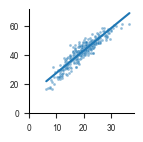

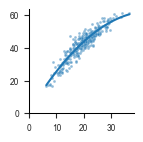

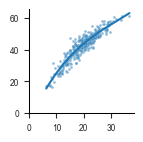

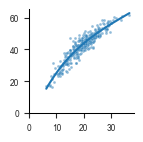

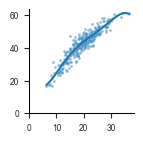

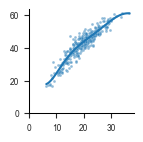

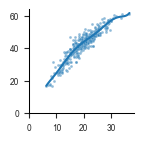

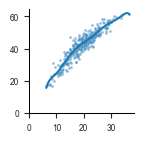

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error, r2_score
# Generate sample data
np.random.seed(0)
X = df['var'].values[:,None]
y = df.k_inertia.values[:,None]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model comparison loop
degrees = [1, 2,3,4,5,6,7,8]
scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
   # poly =SplineTransformer(n_knots=degree+1, degree=1)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    scores.append(r2_test)
    print(f"Degree {degree} - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}, R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}")

    # Plotting
    fig = plt.figure(figsize=(1.35,1.35))
    gs = gridspec.GridSpec(1,1)
    ax=fig.add_subplot(gs[0,0])
    sns.scatterplot(x=X[:,0], y=y[:,0],ax=ax,s=4,alpha=.5 )
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_plot_pred = model.predict(poly.transform(X_plot))
    sns.lineplot(x=X_plot[:,0], y=y_plot_pred[:,0],ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('', fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6,bottom=True)
    ax.yaxis.set_tick_params(labelsize=6,left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.set_xlim(0)
    ax.set_ylim(0)
    fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/BWM/Figures/Figure_modelcomparison_a_'+str(degree)+'.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
            )


In [85]:
# Fit models with different polynomial degrees
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
aics = []
bics = []
for degree in range(1, 8):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression model
    model = sm.OLS(y, X_poly).fit()

    # Calculate AIC and BIC
    aic = model.aic
    bic = model.bic
    aics.append(aic)
    bics.append(bic)
    # Print results
    print(f"Degree {degree}: AIC = {aic:.2f}, BIC = {bic:.2f}")

Degree 1: AIC = 4438.08, BIC = 4447.30
Degree 2: AIC = 4373.13, BIC = 4386.95
Degree 3: AIC = 4371.15, BIC = 4389.59
Degree 4: AIC = 4372.82, BIC = 4395.87
Degree 5: AIC = 4374.81, BIC = 4402.47
Degree 6: AIC = 4376.43, BIC = 4408.70
Degree 7: AIC = 4376.74, BIC = 4409.01


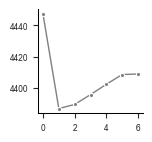

In [87]:
fig = plt.figure(figsize=(1.35,1.35))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.lineplot(bics,ax=ax,lw=1,color='gray',marker='.')
#ax.set_ylim(4250,4460)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('', fontsize=8)
ax.xaxis.set_tick_params(labelsize=6,bottom=True)
ax.yaxis.set_tick_params(labelsize=6,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/BWM/Figures/Figure_modelcomparison_b.jpg',
format='jpeg',
dpi=450,
        bbox_inches='tight'
        )

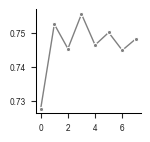

In [49]:
fig = plt.figure(figsize=(1.35,1.35))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.lineplot(scores,ax=ax,lw=1,color='gray',marker='.')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('', fontsize=8)
ax.xaxis.set_tick_params(labelsize=6,bottom=True)
ax.yaxis.set_tick_params(labelsize=6,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/BWM/Figures/Figure_modelcomparison_c.jpg',
format='jpeg',
dpi=450,
        bbox_inches='tight'
        )

In [64]:
## Confidence intervals
from sklearn.linear_model import Lasso

    
def f(x, a,b,c,d):
    return a+b*np.log(c*x+d)

bounds = ([-np.inf,-np.inf,-np.inf,-np.inf],
                  [1,np.inf,np.inf,np.inf])
  
alphas= []
degree= 2
for run in range(1000):
    sample_df = df.sample(frac=1,replace=True)
    X = sample_df['var'].values[:,None]
    y = sample_df.k_inertia.values[:,None]
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X)
    # 
    #popt, pcov = opt.curve_fit(f, X[:,0], y[:,0], method="trf",max_nfev=10000,bounds = bounds)

    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y)
    alphas.append(model.intercept_.item())

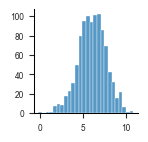

In [65]:
fig = plt.figure(figsize=(1.35,1.35))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
sns.histplot(alphas,ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('', fontsize=8)
ax.xaxis.set_tick_params(labelsize=6,bottom=True)
ax.yaxis.set_tick_params(labelsize=6,left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
fig.savefig('/Users/cl1704/PycharmProjects/embedding_dimension/BWM/Figures/Figure_modelcomparison_d.jpg',
format='jpeg',
dpi=450,
        bbox_inches='tight'
        )

In [124]:
len(alphas)

1000

In [20]:
## Confidence intervals
from sklearn.linear_model import Lasso

    
def f(x, a,b,c,d,e,f):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5

bounds = ([0,-np.inf,-np.inf,-np.inf,-np.inf,-np.inf],
                  [np.inf,np.inf,np.inf,np.inf,np.inf,np.inf])
  

X = df['var'].values[:,None]
y = df.k_inertia.values[:,None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# 
popt, pcov = opt.curve_fit(f, X_train[:,0], y_train[:,0], method="trf",max_nfev=10000,bounds = bounds)

y_test_pred = f(X_test, *popt)
r2_test = r2_score(y_test, y_test_pred)


In [12]:
r2_test

0.7495067801883574

In [15]:
r2_test

0.7502646221921228

In [19]:
r2_test

0.7517348634818615

In [21]:
r2_test

0.7505831440409998